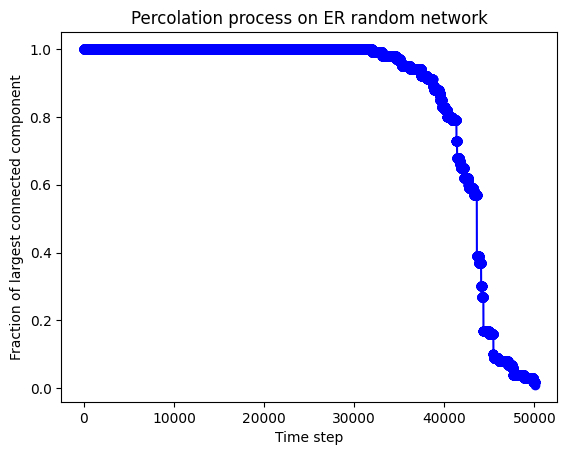

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def er_random_network(N, P):
    # 生成一个空的无向图
    G = nx.Graph()
    # 添加N个节点
    G.add_nodes_from(range(N))
    # 遍历所有可能的边
    for i in range(N):
        for j in range(i+1, N):
            # 以概率P添加边
            if np.random.random() < P:
                G.add_edge(i, j)
    # 返回生成的网络
    return G

def percolation_process(G, p):
    # 获取网络的节点数和边数
    N = G.number_of_nodes()
    M = G.number_of_edges()
    # 复制网络的边集合，用于随机删除
    edges = list(G.edges())
    # 初始化一个空列表，用于存储每个时间步长的最大连通组分的比例
    fractions = []
    # 初始化时间步长为0
    t = 0
    # 当网络还有边时，执行循环
    while M > 0:
        # 随机选择一条边
        i = np.random.randint(M)
        edge = edges[i]
        # 以概率p删除该边
        if np.random.random() < p:
            G.remove_edge(*edge)
            edges.pop(i)
            M -= 1
        # 计算网络的最大连通组分的节点数
        largest_cc = max(nx.connected_components(G), key=len)
        size = len(largest_cc)
        # 计算最大连通组分的比例，并添加到列表中
        fraction = size / N
        fractions.append(fraction)
        # 增加时间步长
        t += 1
    # 返回每个时间步长的最大连通组分的比例列表
    return fractions

def plot_fractions(fractions):
    # 获取时间步长的个数
    T = len(fractions)
    # 创建一个数组，表示时间轴
    times = np.arange(T)
    # 创建一个图形对象和一个子图对象
    fig, ax = plt.subplots()
    # 在子图上绘制折线图，横轴是时间，纵轴是最大连通组分的比例
    ax.plot(times, fractions, color='blue', marker='o')
    # 设置子图的标题和坐标轴标签
    ax.set_title('Percolation process on ER random network')
    ax.set_xlabel('Time step')
    ax.set_ylabel('Fraction of largest connected component')
    # 显示图形
    plt.show()


# 生成ER随机网络
G = er_random_network(100, 0.1)
# 模拟渗流过程，并获取每个时间步长的最大连通组分的比例列表
fractions = percolation_process(G, 0.01)
# 绘制折线图，展示渗流过程的结果
plot_fractions(fractions)